## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=len(combined)
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=combined[combined.duplicated(["Mouse ID","Timepoint"])]
duplicate["Mouse ID"].nunique


<bound method IndexOpsMixin.nunique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = combined.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep= "last").reset_index(drop=True)
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_df)

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": mean, 
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": sd, 
                        "SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = mouse_study_df.groupby("Drug Regimen")
mean = stats["Tumor Volume (mm3)"].mean()
median = stats["Tumor Volume (mm3)"].median()
variance = stats["Tumor Volume (mm3)"].var()
sd = stats["Tumor Volume (mm3)"].std()
sem = stats["Tumor Volume (mm3)"].sem()

# This method produces everything in a single groupby function
stats_df = pd.DataFrame({"Mean": mean, 
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": sd, 
                        "SEM": sem})

stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

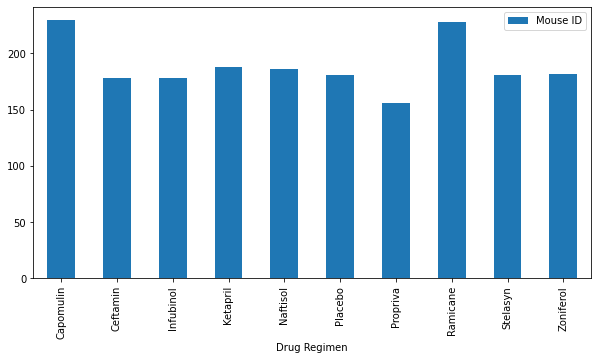

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_data = pd.DataFrame(mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()

treatment_df = drug_data[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")

treatment_df.plot(kind="bar", figsize=(10,5))
plt.show()


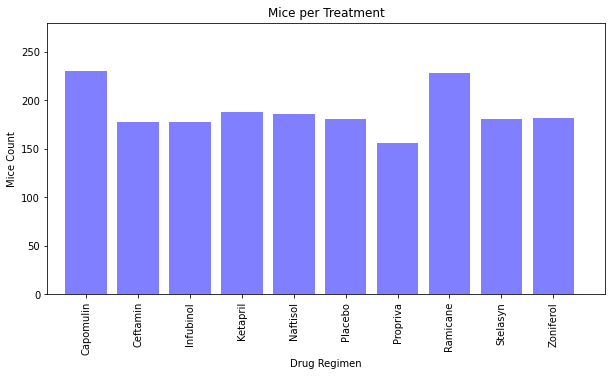

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_list = stats_df.index.tolist()
regimen_count= (mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(regimen_count))
tick_locations = [value for value in x_axis]
                   
plt.figure(figsize=(10,5))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")


plt.xticks(tick_locations, regimen_list, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(regimen_count)+50)

plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.show()


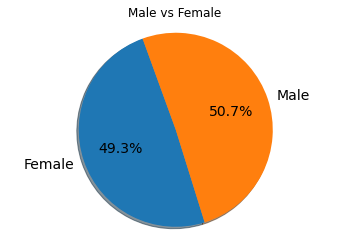

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=pd.DataFrame(mouse_study_df.groupby(["Sex"]).count()).reset_index()
gender = gender_df[["Sex", "Mouse ID"]]

gender.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle = 110, shadow=True, labels=gender["Sex"], legend=False, fontsize=14)
plt.title("Male vs Female")
plt.ylabel("")
plt.axis("equal")
plt.show()

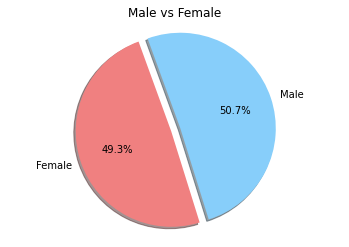

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (mouse_study_df.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 110)
plt.title("Male vs Female")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#treatment = mouse_study_df[mouse_study_df['Drug Regimen'].isin(treatment_list)]

#last_tumor = treatment.groupby(['Drug Regimen', 'Mouse ID']).sum(max('Tumor Volume (mm3)'))
 
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df=pd.DataFrame(mouse_study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge=pd.merge(last_timepoint_df, mouse_study_df, on=('Mouse ID'))

timepoint_merge

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,t573,0,Ceftamin,Female,15,27,0,45.000000,0
1,u153,0,Ceftamin,Female,11,25,0,45.000000,0
2,d133,0,Zoniferol,Male,5,30,0,45.000000,0
3,n482,0,Propriva,Female,4,29,0,45.000000,0
4,o848,0,Stelasyn,Female,14,27,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    
for treatment in treatment_list:  
    
    #subset dataframe
    vol=timepoint_merge.loc[timepoint_merge['Drug Regimen'] == treatment]
    final_volume_df=vol.loc[vol['Timepoint']==vol['Max Timepoint']]
    
    #series for final volume values
    values=final_volume_df['Tumor Volume (mm3)']
    tumor_vol.append(values)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = timepoint_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq} for {treatment}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq} for {treatment}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr} for {treatment}")
    print(f"The the median Tumor Volume (mm3) is: {quartiles[0.5]} for {treatment}")
    print("-----------------------")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")
    print("-----------------------")
    print("-----------------------")


The lower quartile of Tumor Volume (mm3) is: 45.0 for Capomulin
The upper quartile of Tumor Volume (mm3) is: 56.32407510749999 for Capomulin
The interquartile range of Tumor Volume (mm3) is: 11.324075107499993 for Capomulin
The the median Tumor Volume (mm3) is: 48.951421075 for Capomulin
-----------------------
Values below 28.01388733875001 could be outliers for Capomulin.
Values above 73.31018776874998 could be outliers for Capomulin.
-----------------------
-----------------------
The lower quartile of Tumor Volume (mm3) is: 45.0 for Ramicane
The upper quartile of Tumor Volume (mm3) is: 56.32407510749999 for Ramicane
The interquartile range of Tumor Volume (mm3) is: 11.324075107499993 for Ramicane
The the median Tumor Volume (mm3) is: 48.951421075 for Ramicane
-----------------------
Values below 28.01388733875001 could be outliers for Ramicane.
Values above 73.31018776874998 could be outliers for Ramicane.
-----------------------
-----------------------
The lower quartile of Tumor 

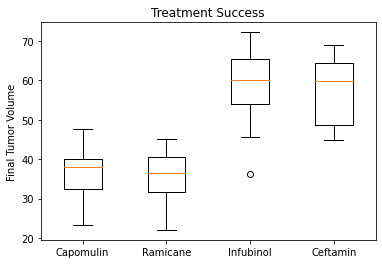

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol)
plt.title('Treatment Success')
plt.ylabel('Final Tumor Volume')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

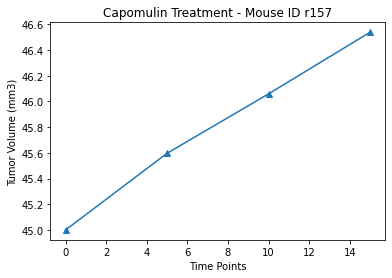

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#isolate Capomulin to locate mouse ID
capomulin_df=mouse_study_df.loc[mouse_study_df['Drug Regimen']=='Capomulin']

mouse=capomulin_df.loc[capomulin_df['Mouse ID']=='r157']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '^')
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment - Mouse ID r157")
plt.show()

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
